In [139]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 

In [140]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=data.feature_names)
df["target"] = cancer.target
df.columns = [i.replace(" ", '_') for i in df.columns]
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [141]:
X=cancer.data
y=cancer.target

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [143]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [144]:
from sklearn.neighbors import KNeighborsClassifier
k=1
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [145]:
y_pred=knn.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9532163742690059


In [147]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[ 58   5]
 [  3 105]]


In [148]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("The Best Parameter:", grid_search.best_params_)
print("The Best Accuracy Score:", grid_search.best_score_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

The Best Parameter: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
The Best Accuracy Score: 0.9622151898734176
Test Accuracy: 0.9590643274853801


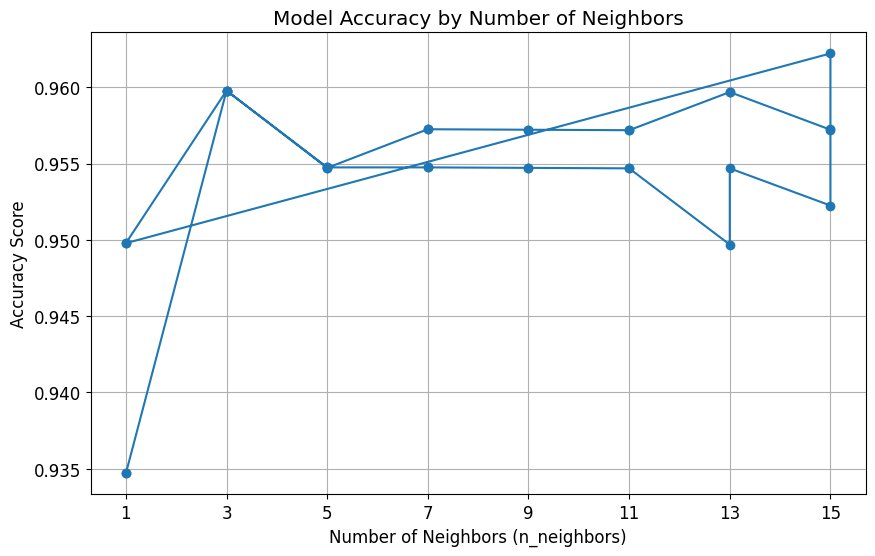

In [149]:
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
neighbors = [param['n_neighbors'] for param in results['params']]


plt.figure(figsize=(10, 6))
plt.plot(neighbors, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy by Number of Neighbors')
plt.xticks(np.unique(neighbors))
plt.grid(True)
plt.show()